In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from gnd.src import basis, data

In [3]:
plt.rc("text", usetex=True)
font = {"family": "serif", "size": 16, "serif": ["computer modern roman"]}
plt.rc("font", **font)

fontsize_title=22
fontsize_label=18
fontsize_legend=16
fontsize_ticks=16

In [4]:
from gnd.configs import ToffoliConfig, FredkinConfig, Weight2ParityZConfig, Weight4ParityXConfig, Weight4ParityZConfig
config = ToffoliConfig()
config2 = Weight2ParityZConfig()

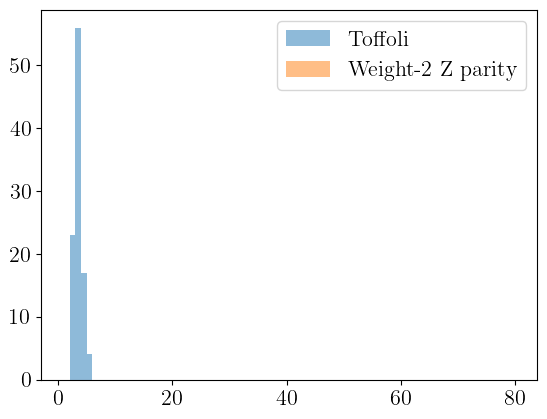

In [5]:
b = basis.construct_full_pauli_basis(config.nqubits)

# init_parameters = 2*np.random.rand(len(b.basis))-1
# init_parameters = b.two_body_projection(init_parameters)

# optimize = optimize.Optimizer(config.unitary, b, init_parameters, max_steps=3000)
seeds = [1] + [n*256 for n in range(1,101,1)] 

num_steps = []
num_steps2 = []
for seed in seeds:
    print(f"Collecting data for seed: {seed}", end="\r")
    config.seed = seed        
    config2.seed = seed
    dat = data.OptimizationData(config, optimizers=[], load_data=True, folder="gnd/data")
    if dat.samples > 0:
        num_steps.append(dat.steps(1)[-1])
    dat2 = data.OptimizationData(config2, optimizers=[], load_data=True, folder="gnd/data")
    if dat2.samples > 0:
        num_steps2.append(dat2.steps(1)[-1])

plt.hist(num_steps, bins=[i+1 for i in range(80)], alpha=0.5, label="Toffoli")
plt.hist(num_steps2, bins=[i+1 for i in range(80)], alpha=0.5, label="Weight-2 Z parity")
plt.legend()
plt.show()

In [6]:
from innocenti.configs import ToffoliConfig, FredkinConfig, Weight2ParityZConfig, Weight4ParityXConfig, Weight4ParityZConfig
config = ToffoliConfig()
config2 = FredkinConfig()

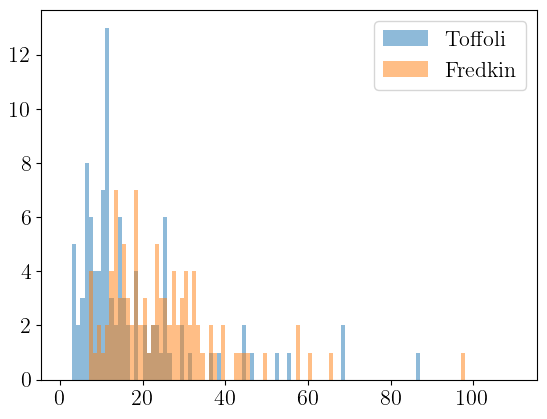

In [7]:
b = basis.construct_full_pauli_basis(config.nqubits)

# init_parameters = 2*np.random.rand(len(b.basis))-1
# init_parameters = b.two_body_projection(init_parameters)

# optimize = optimize.Optimizer(config.unitary, b, init_parameters, max_steps=3000)
seeds = [1] + [n*256 for n in range(1,101,1)] 

num_steps = []
num_steps2 = []
for seed in seeds:
    print(f"Collecting data for seed: {seed}", end="\r")
    config.seed = seed        
    config2.seed = seed
    dat = data.OptimizationData(config, optimizers=[], load_data=True, folder="innocenti/data")
    if dat.samples > 0:
        num_steps.append(dat.steps(1)[-1])
    dat2 = data.OptimizationData(config2, optimizers=[], load_data=True, folder="innocenti/data")
    if dat2.samples > 0:
        num_steps2.append(dat2.steps(1)[-1])

plt.hist(num_steps, bins=[i+1 for i in range(110)], alpha=0.5, label="Toffoli")
plt.hist(num_steps2, bins=[i+1 for i in range(110)], alpha=0.5, label="Fredkin")
plt.legend()
plt.show()

In [8]:
from jax_gd.configs import ToffoliConfig, FredkinConfig, Weight2ParityZConfig, Weight4ParityXConfig, Weight4ParityZConfig
config = ToffoliConfig()
config2 = Weight2ParityZConfig()

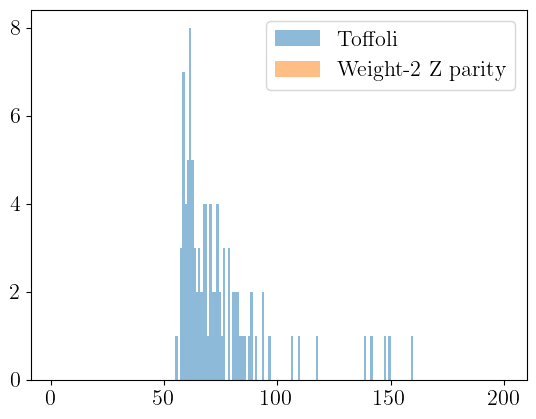

In [9]:
b = basis.construct_full_pauli_basis(config.nqubits)

# init_parameters = 2*np.random.rand(len(b.basis))-1
# init_parameters = b.two_body_projection(init_parameters)

# optimize = optimize.Optimizer(config.unitary, b, init_parameters, max_steps=3000)
seeds = [1] + [n*256 for n in range(1,101,1)] 

num_steps = []
num_steps2 = []
for seed in seeds:
    print(f"Collecting data for seed: {seed}", end="\r")
    config.seed = seed        
    config2.seed = seed
    dat = data.OptimizationData(config, optimizers=[], load_data=True, folder="jax_gd/data")
    if dat.samples > 0:
        num_steps.append(dat.steps(1)[-1])
    dat2 = data.OptimizationData(config2, optimizers=[], load_data=True, folder="jax_gd/data")
    if dat2.samples > 0:
        num_steps2.append(dat2.steps(1)[-1])

plt.hist(num_steps, bins=[i+1 for i in range(200)], alpha=0.5, label="Toffoli")
plt.hist(num_steps2, bins=[i+1 for i in range(200)], alpha=0.5, label="Weight-2 Z parity")
plt.legend()
plt.show()

Toffoli gate comparison

In [ ]:
from gnd.configs import ToffoliConfig as ToffoliConfigGnd
config = ToffoliConfig()
config_gnd = ToffoliConfigGnd()
config.max_steps = 1000
config_gnd.max_steps = 1000
config_gnd.commute = False
b = basis.construct_full_pauli_basis(config.nqubits)


# init_parameters = 2*np.random.rand(len(b.basis))-1
# init_parameters = b.two_body_projection(init_parameters)

# optimize = optimize.Optimizer(config.unitary, b, init_parameters, max_steps=3000)
seeds = [1] + [n*256 for n in range(1,101,1)] 

num_steps_gnd = []
num_steps_sgd = []
num_steps_jaxgd = []
for seed in seeds:
    print(f"Collecting data for seed: {seed}", end="\r")
    config.seed = seed        
    config2.seed = seed
    config_gnd.seed = seed
    dat_gnd = data.OptimizationData(config_gnd, optimizers=[], load_data=True, folder="gnd/data")
    if dat_gnd.samples > 0:
        num_steps_gnd.append(dat_gnd.steps(1)[-1])
    dat_sgd = data.OptimizationData(config, optimizers=[], load_data=True, folder="innocenti/data")
    if dat_sgd.samples > 0:
        num_steps_sgd.append(dat_sgd.steps(1)[-1])
    dat_jaxgd = data.OptimizationData(config, optimizers=[], load_data=True, folder="jax_gd/data")
    if dat_jaxgd.samples > 0:
        num_steps_jaxgd.append(dat_jaxgd.steps(1)[-1])

plt.figure(figsize=(8,5))
plt.title("Toffoli gate", fontsize=fontsize_title)
plt.hist(num_steps_gnd, bins=[i+1 for i in range(110)], alpha=0.5, label="Geodesic algorithm")
plt.hist(num_steps_sgd, bins=[i+1 for i in range(110)], alpha=0.5, label="Stochastic gradient descent")
plt.hist(num_steps_jaxgd, bins=[i+1 for i in range(110)], alpha=0.5, label="JAX gradient descent")
plt.text(-20, 20.7, "(a)", fontsize=fontsize_title)
plt.xticks([0,20,40,60,80,100], fontsize=fontsize_ticks)
plt.yticks([2,4,6,8,10,12,14,16,18], fontsize=fontsize_ticks)
plt.xlabel("Steps to solution", fontsize=fontsize_label)
plt.ylabel("Number of solutions (100 trials)", fontsize=fontsize_label)
plt.legend(fontsize=fontsize_legend)
plt.savefig(f"plots/toffoli_gate_comparison_max_steps{config.max_steps}.pdf", bbox_inches='tight')
plt.show()

Fredkin gate comparison

In [ ]:
from gnd.configs import FredkinConfig as FredkinConfigGnd
config = FredkinConfig()
config_gnd = FredkinConfigGnd()
config.max_steps = 1000
config_gnd.max_steps = 1000
config_gnd.commute = False
b = basis.construct_full_pauli_basis(config.nqubits)


# init_parameters = 2*np.random.rand(len(b.basis))-1
# init_parameters = b.two_body_projection(init_parameters)

# optimize = optimize.Optimizer(config.unitary, b, init_parameters, max_steps=3000)
seeds = [1] + [n*256 for n in range(1,101,1)] 

num_steps_gnd = []
num_steps_sgd = []
num_steps_jaxgd = []
for seed in seeds:
    print(f"Collecting data for seed: {seed}", end="\r")
    config.seed = seed        
    config2.seed = seed
    config_gnd.seed = seed
    dat_gnd = data.OptimizationData(config_gnd, optimizers=[], load_data=True, folder="gnd/data")
    if dat_gnd.samples > 0:
        num_steps_gnd.append(dat_gnd.steps(1)[-1])
    dat_sgd = data.OptimizationData(config, optimizers=[], load_data=True, folder="innocenti/data")
    if dat_sgd.samples > 0:
        num_steps_sgd.append(dat_sgd.steps(1)[-1])
    dat_jaxgd = data.OptimizationData(config, optimizers=[], load_data=True, folder="jax_gd/data")
    if dat_jaxgd.samples > 0:
        num_steps_jaxgd.append(dat_jaxgd.steps(1)[-1])

plt.figure(figsize=(8,5))
plt.title("Fredkin gate", fontsize=fontsize_title)
plt.hist(num_steps_gnd, bins=[i+1 for i in range(110)], alpha=0.5, label="Geodesic algorithm")
plt.hist(num_steps_sgd, bins=[i+1 for i in range(110)], alpha=0.5, label="Stochastic gradient descent")
plt.hist(num_steps_jaxgd, bins=[i+1 for i in range(110)], alpha=0.5, label="JAX gradient descent")
plt.text(-20, 20.7, "(a)", fontsize=fontsize_title)
plt.xticks([0,20,40,60,80,100], fontsize=fontsize_ticks)
plt.yticks([2,4,6,8,10,12,14,16,18], fontsize=fontsize_ticks)
plt.xlabel("Steps to solution", fontsize=fontsize_label)
plt.ylabel("Number of solutions (100 trials)", fontsize=fontsize_label)
plt.legend(fontsize=fontsize_legend)
plt.savefig(f"plots/toffoli_gate_comparison_max_steps{config.max_steps}.pdf", bbox_inches='tight')
plt.show()

5 qubit gates

In [ ]:
config = Weight4ParityXConfig()
config.max_steps = 1000
b = basis.construct_full_pauli_basis(config.nqubits)

# init_parameters = 2*np.random.rand(len(b.basis))-1
# init_parameters = b.two_body_projection(init_parameters)

# optimize = optimize.Optimizer(config.unitary, b, init_parameters, max_steps=3000)
seeds = [1] + [n*256 for n in range(1,101,1)] 

max_fidelity_gnd = []
max_fidelity_sgd = []
max_fidelity_jaxgd = []
for seed in seeds:
    print(f"Collecting data for seed: {seed}", end="\r")
    config.seed = seed        
    dat_gnd = data.OptimizationData(config, optimizers=[], load_data=True, folder="gnd/data")
    if dat_gnd.samples > 0:
        max_fidelity_gnd.append(dat_gnd.max_fidelity(1))
    dat_sgd = data.OptimizationData(config, optimizers=[], load_data=True, folder="innocenti/data")
    if dat_sgd.samples > 0:
        max_fidelity_sgd.append(dat_sgd.max_fidelity(1))
    dat_jaxgd = data.OptimizationData(config, optimizers=[], load_data=True, folder="jax_gd/data")
    if dat_jaxgd.samples > 0:
        max_fidelity_jaxgd.append(dat_jaxgd.max_fidelity(1))

plt.figure(figsize=(8,6))
plt.title("Weight-4 X parity gate", fontsize=fontsize_title)
plt.hist(max_fidelity_gnd, bins=[0.9+(i+1)/1000 for i in range(100)], alpha=0.5, label="Geodesic algorithm")
plt.hist(max_fidelity_sgd, bins=[0.9+(i+1)/1000 for i in range(100)], alpha=0.5, label="Stochastic gradient descent")
plt.hist(max_fidelity_jaxgd, bins=[0.9+(i+1)/1000 for i in range(100)], alpha=0.5, label="JAX gradient descent")
# plt.xticks([0,20,40,60,80,100], fontsize=fontsize_ticks)
# plt.yticks([2,4,6,8,10,12,14,16,18], fontsize=fontsize_ticks)
plt.xlabel(f"Maximum fidelity ({config.max_steps} steps)", fontsize=fontsize_label)
plt.ylabel("Number of solutions (100 trials)", fontsize=fontsize_label)
plt.legend(fontsize=fontsize_legend)
plt.savefig(f"plots/w4px_steps{config.max_steps}.pdf", bbox_inches='tight')
plt.show()

In [ ]:
config = Weight4ParityZConfig()
b = basis.construct_full_pauli_basis(config.nqubits)

# init_parameters = 2*np.random.rand(len(b.basis))-1
# init_parameters = b.two_body_projection(init_parameters)

# optimize = optimize.Optimizer(config.unitary, b, init_parameters, max_steps=3000)
seeds = [1] + [n*256 for n in range(1,101,1)] 

max_fidelity_gnd = []
max_fidelity_sgd = []
max_fidelity_jaxgd = []
for seed in seeds:
    print(f"Collecting data for seed: {seed}", end="\r")
    config.seed = seed        
    config2.seed = seed
    dat_gnd = data.OptimizationData(config, optimizers=[], load_data=True, folder="gnd/data")
    if dat_gnd.samples > 0:
        max_fidelity_gnd.append(dat_gnd.max_fidelity(1))
    dat_sgd = data.OptimizationData(config, optimizers=[], load_data=True, folder="innocenti/data")
    if dat_sgd.samples > 0:
        max_fidelity_sgd.append(dat_sgd.max_fidelity(1))
    dat_jaxgd = data.OptimizationData(config, optimizers=[], load_data=True, folder="jax_gd/data")
    if dat_jaxgd.samples > 0:
        max_fidelity_jaxgd.append(dat_jaxgd.max_fidelity(1))

plt.figure(figsize=(8,6))
plt.title("Weight-4 X parity gate", fontsize=fontsize_title)
plt.hist(max_fidelity_gnd, bins=[0.9+(i+1)/1000 for i in range(100)], alpha=0.5, label="Geodesic algorithm")
# plt.hist(max_fidelity_sgd, bins=[(i+1)/100 for i in range(100)], alpha=0.5, label="Stochastic gradient descent")
# plt.hist(max_fidelity_jaxgd, bins=[(i+1)/100 for i in range(100)], alpha=0.5, label="JAX gradient descent")
# plt.xticks([0,20,40,60,80,100], fontsize=fontsize_ticks)
# plt.yticks([2,4,6,8,10,12,14,16,18], fontsize=fontsize_ticks)
plt.xlabel("Maximum fidelity (1000 steps)", fontsize=fontsize_label)
plt.ylabel("Number of solutions (100 trials)", fontsize=fontsize_label)
plt.legend(fontsize=fontsize_legend)
# plt.savefig("plots/.pdf", bbox_inches='tight')
plt.show()